**Satheesh D M - MA24M023**

**Saswata Ghosh - MA24M022**

**Stock Price Prediction Model for NTPC**

**Exploratory Data Analysis**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime

In [6]:
import os
data_path = os.path.join("..", "Data", "raw_data/NTPC.csv")

df = pd.read_csv(data_path)
# Display the first 5 rows
print(df.head())

         Date Symbol Series  Prev Close   Open   High    Low   Last  Close  \
0  2004-11-05   NTPC     EQ       62.00  88.00  88.00  70.00  75.55  75.55   
1  2004-11-08   NTPC     EQ       75.55  76.80  78.60  75.00  75.15  75.20   
2  2004-11-09   NTPC     EQ       75.20  75.10  76.10  74.55  75.25  75.30   
3  2004-11-10   NTPC     EQ       75.30  75.50  75.95  75.00  75.05  75.05   
4  2004-11-11   NTPC     EQ       75.05  75.35  75.40  74.30  74.60  74.45   

    VWAP     Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  73.12  232535736  1.700363e+15     NaN           115350904       0.4961  
1  76.88   68865277  5.294024e+14     NaN            25571231       0.3713  
2  75.28   37460886  2.820236e+14     NaN            13585363       0.3627  
3  75.32   17413433  1.311585e+14     NaN             7039001       0.4042  
4  74.74   15961426  1.193037e+14     NaN             7286922       0.4565  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4088 non-null   object 
 1   Symbol              4088 non-null   object 
 2   Series              4088 non-null   object 
 3   Prev Close          4088 non-null   float64
 4   Open                4088 non-null   float64
 5   High                4088 non-null   float64
 6   Low                 4088 non-null   float64
 7   Last                4088 non-null   float64
 8   Close               4088 non-null   float64
 9   VWAP                4088 non-null   float64
 10  Volume              4088 non-null   int64  
 11  Turnover            4088 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4088 non-null   int64  
 14  %Deliverble         4088 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 479.2

Shape of the datasets

In [9]:
df.shape

(4088, 15)

In [10]:
unique_values = df['Date'].nunique()
print(f"Number of unique values in 'column_name': {unique_values}")

Number of unique values in 'column_name': 4088


So, all values are from different days..No date is not repeating here

Check missing value

In [11]:
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1632
Deliverable Volume       0
%Deliverble              0
dtype: int64


Only Traders column has 1632 null values

In [12]:
print(df.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [13]:
df.drop(columns=['Symbol', 'Series'], inplace=True)

In [14]:
print(df.columns)

Index(['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'],
      dtype='object')


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [16]:
print(df)

            Prev Close    Open    High     Low    Last   Close    VWAP  \
Date                                                                     
2004-11-05       62.00   88.00   88.00   70.00   75.55   75.55   73.12   
2004-11-08       75.55   76.80   78.60   75.00   75.15   75.20   76.88   
2004-11-09       75.20   75.10   76.10   74.55   75.25   75.30   75.28   
2004-11-10       75.30   75.50   75.95   75.00   75.05   75.05   75.32   
2004-11-11       75.05   75.35   75.40   74.30   74.60   74.45   74.74   
...                ...     ...     ...     ...     ...     ...     ...   
2021-04-26      102.55  103.95  103.95  100.85  102.50  102.40  102.08   
2021-04-27      102.40  102.05  103.55  101.70  101.85  102.05  102.35   
2021-04-28      102.05  102.85  103.95  102.15  103.60  103.60  103.15   
2021-04-29      103.60  104.60  105.00  102.65  102.95  103.05  103.70   
2021-04-30      103.05  102.25  105.65  102.05  102.40  102.45  103.71   

               Volume      Turnover  

In [17]:
df.tail(5)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2021-04-26,102.55,103.95,103.95,100.85,102.50,102.40,102.08,24369413,2.487514e+14,66644.0,9190471,0.3771
2021-04-27,102.40,102.05,103.55,101.70,101.85,102.05,102.35,17763436,1.818113e+14,49985.0,7220824,0.4065
2021-04-28,102.05,102.85,103.95,102.15,103.60,103.60,103.15,15160578,1.563882e+14,50680.0,7815042,0.5155
2021-04-29,103.60,104.60,105.00,102.65,102.95,103.05,103.70,11588556,1.201737e+14,38532.0,4040332,0.3486
2021-04-30,103.05,102.25,105.65,102.05,102.40,102.45,103.71,15321193,1.588952e+14,48217.0,4597153,0.3001


**Train-Test Split**

In [20]:
train_size = int(len(df) * 0.9)  # 80% for training
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]
# Print Train and Test Sizes
print(f"Train Size: {len(train_df)} | Test Size: {len(test_df)}")

Train Size: 3679 | Test Size: 409


**Moving Averages & Trend Analysis**

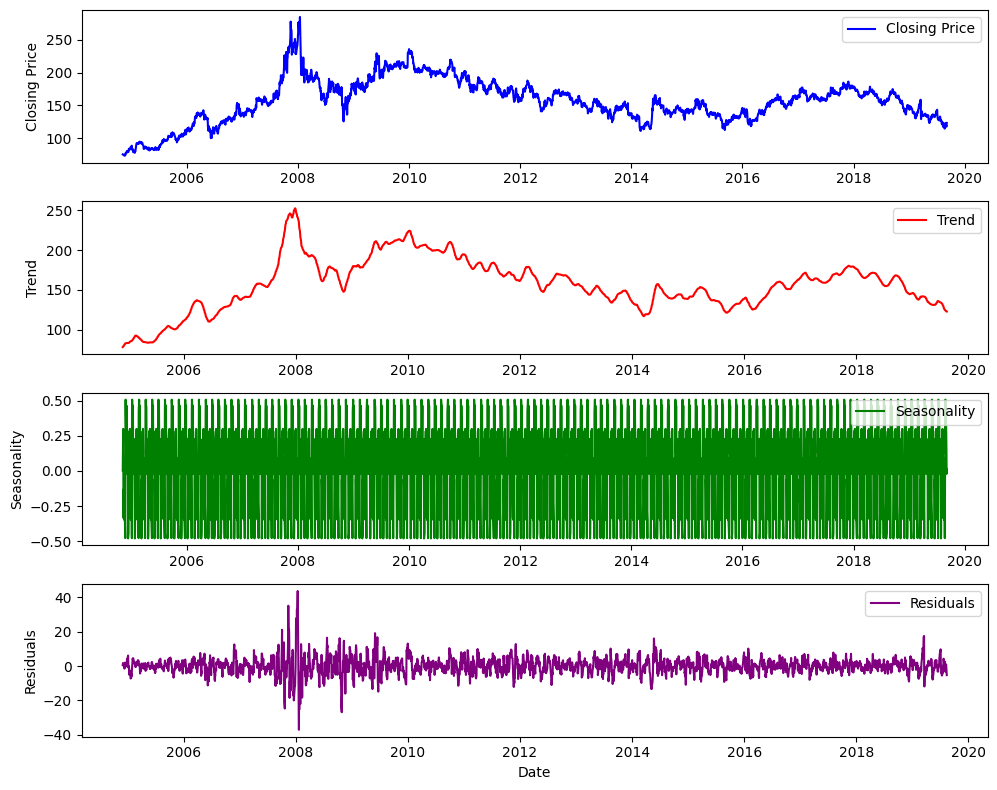

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(train_df['Close'], model='additive', period=30)  # Assume monthly seasonality
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(train_df.index, train_df['Close'], label="Closing Price", color='blue')
plt.ylabel("Closing Price")
plt.legend()

plt.subplot(412)
plt.plot(decomp.trend, label="Trend", color='red')
plt.ylabel("Trend")
plt.legend()

plt.subplot(413)
plt.plot(decomp.seasonal, label="Seasonality", color='green')
plt.ylabel("Seasonality")
plt.legend()

plt.subplot(414)
plt.plot(decomp.resid, label="Residuals", color='purple')
plt.ylabel("Residuals")
plt.xlabel("Date")
plt.legend()

plt.tight_layout()
plt.show()

***Augmented Dickey-Fuller (ADF)***

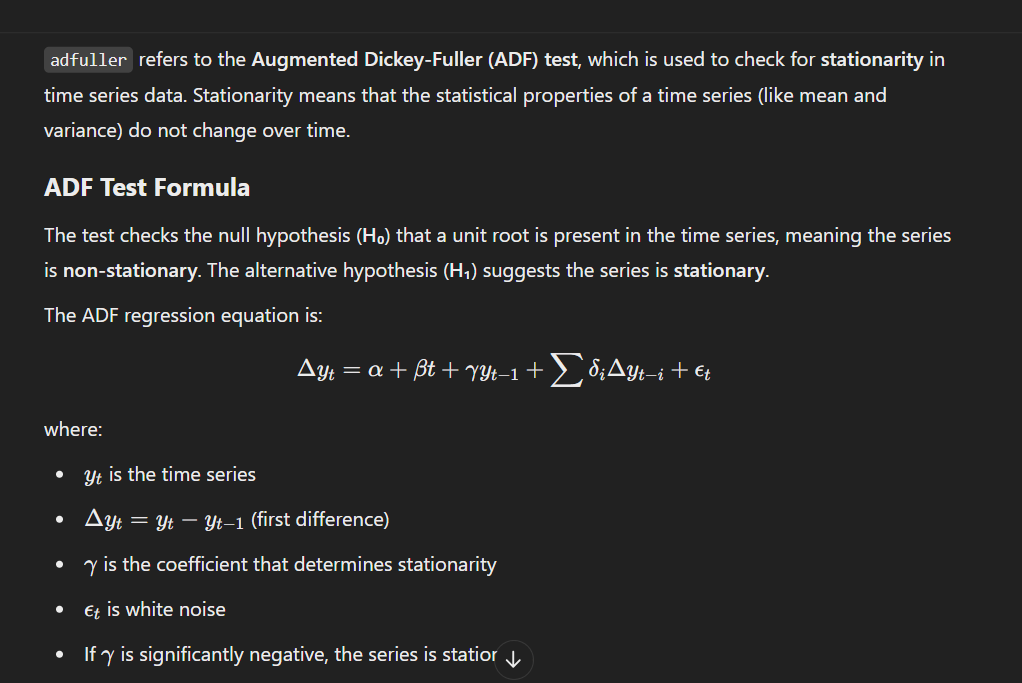

In [27]:
from statsmodels.tsa.stattools import adfuller

residuals = decomp.resid.dropna()
adf_test = adfuller(residuals)
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

ADF Test Statistic: -16.551981431112218
p-value: 1.941383896261899e-29
Critical Values: {'1%': np.float64(-3.432158719084614), '5%': np.float64(-2.8623391910775715), '10%': np.float64(-2.567195421889386)}


**Daily Return Over Time**

Plotting Daily Returns Over Time is crucial for understanding a stock’s risk, volatility, and market behavior. It helps in:

1.Identifying Volatility & Risk:

High fluctuations → High risk, potential for big gains/losses.

Stable daily returns → Less risky, but lower return potential.

Sudden spikes → Market reactions to events (earnings, news, economic shifts).

2.Detecting Market Crashes & Bull Runs:

Sharp negative spikes → Market crashes, corrections, or bad news.

Consistently positive returns → Bullish trend, strong uptrend.

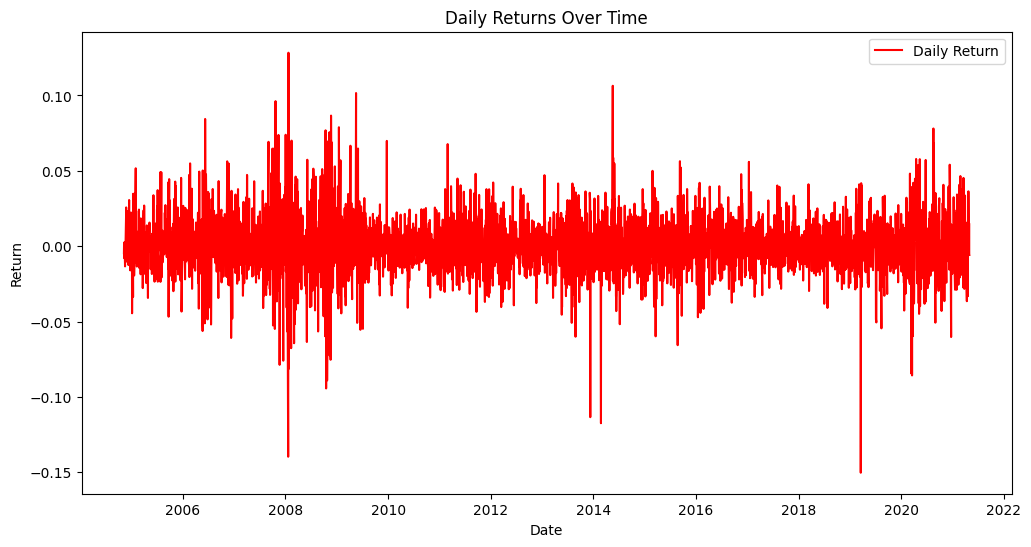

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()
plt.figure(figsize=(12,6))
plt.plot(df['Daily_Return'], label='Daily Return', color='red')
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.show()

**Plotting Trading Volume Over Time**

Trading Volume represents the number of shares traded in a given period. Plotting it can reveal:

 Market Activity & Liquidity → Higher volume means higher market interest.

 Volatility Indicator → Sudden spikes in volume often indicate major price movements.

Event Reactions → Earnings reports, news, or financial crises cause volume surges.

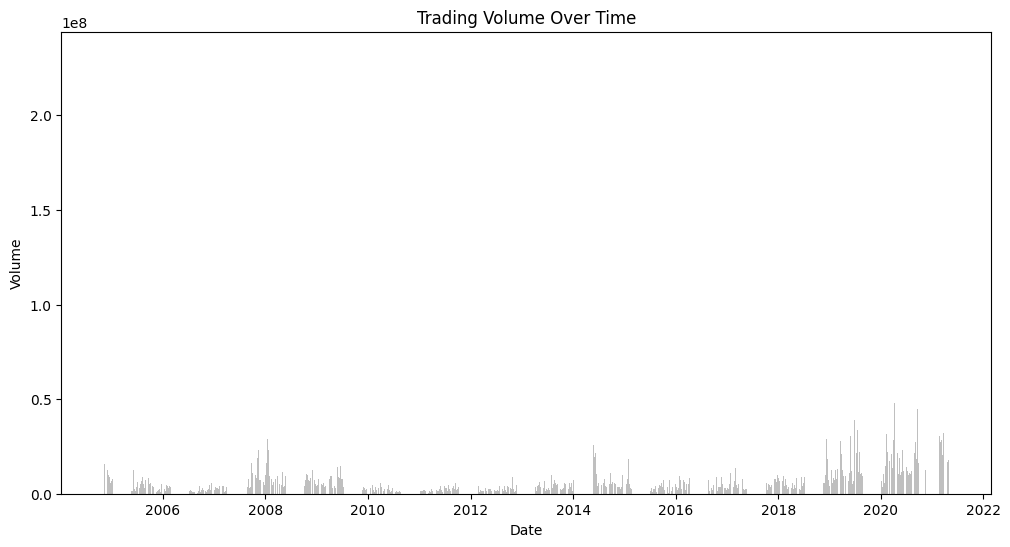

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(df.index, df['Volume'], color='gray', alpha=0.5)
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

Plotting Trading Deliverable Volume Over Time

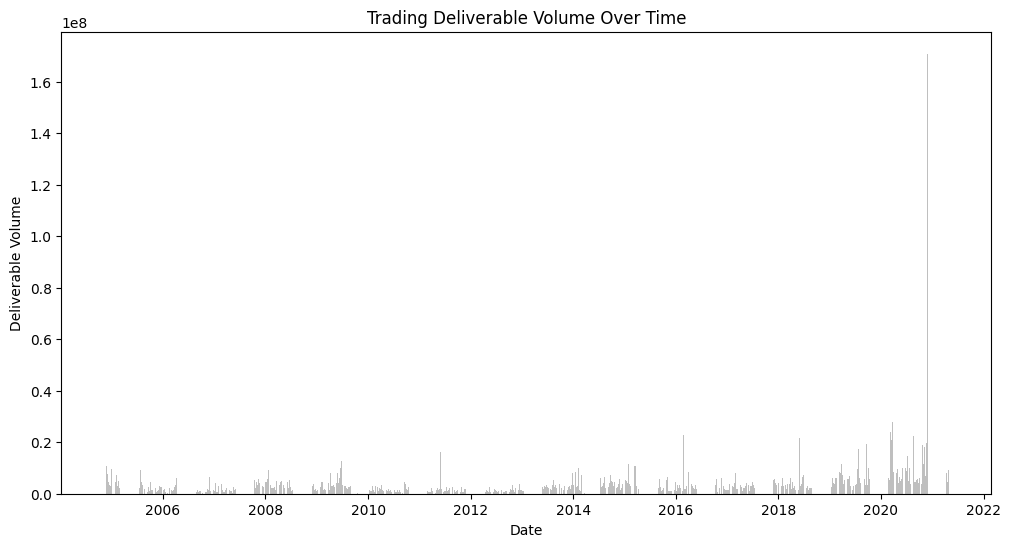

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(df.index, df['Deliverable Volume'], color='gray', alpha=0.5)
plt.title("Trading Deliverable Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Deliverable Volume")
plt.show()

**Rolling Volatility**

Rolling Volatility measures the fluctuation of stock returns over a moving window (e.g., 30 days).

It helps investors assess risk and market uncertainty over time.

High volatility → More risk, uncertainty, potential big price swings.

Low volatility → Stable market, predictable price movement

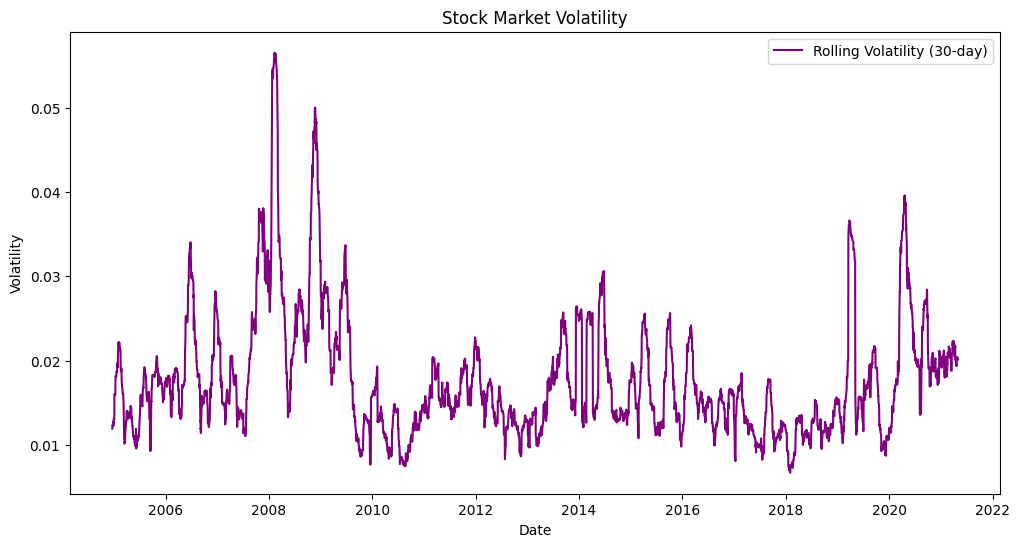

In [ ]:
df['Volatility'] = df['Daily_Return'].rolling(window=30).std()
plt.figure(figsize=(12,6))
plt.plot(df['Volatility'], label='Rolling Volatility (30-day)', color='purple')
plt.title("Stock Market Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


**Auto-Correlation**

Auto-correlation measures how a stock’s current price (or return) is related to its past values over different time lags. It helps in identifying trends, seasonality, and mean-reverting behavior in stock prices.

Auto-correlation helps us at:

1.Detecting Trend

Positive autocorrelation → If past returns influence future returns (momentum).

Negative autocorrelation → If returns tend to reverse (mean-reverting behavior).


2.Choosing Model Parameters (Lag Selection)

Helps decide how many past observations are relevant when building models like ARIMA for time series forecasting.

Identifies the MA (Moving Average) component



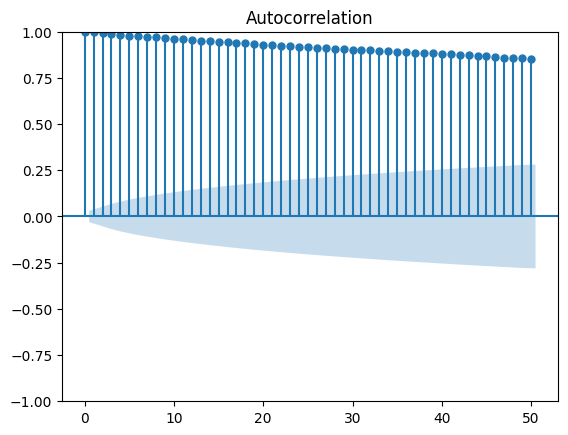

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Close'].dropna(), lags=50)
plt.show()

 Partial Autocorrelation Function (PACF)

 The PACF measures the direct correlation between the series and its lagged values, while removing the influence of shorter lags. It essentially captures the correlation between a series and its lag k, after removing the effect of correlations at shorter lags (1 through k-1).


Identifies the AR (AutoRegressive) component.

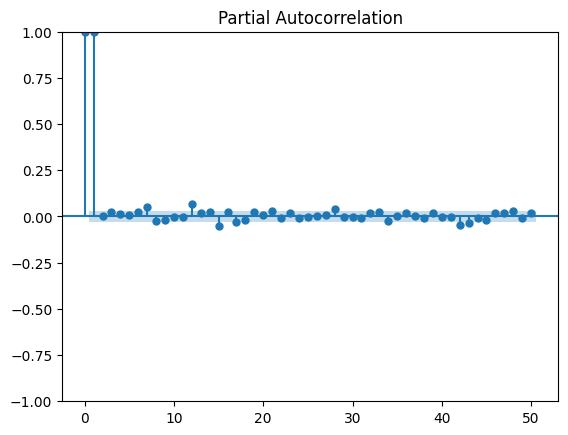

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Close'].dropna(), lags=50)
plt.show()

Boxplot: Detect Outliers & Volatility

A boxplot (also known as a box-and-whisker plot) visualizes the distribution of a dataset based on quartiles and helps in identifying outliers and understanding the spread of the data (volatility).

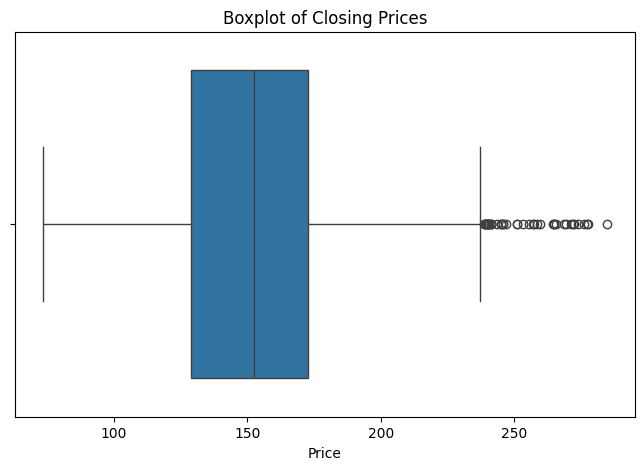

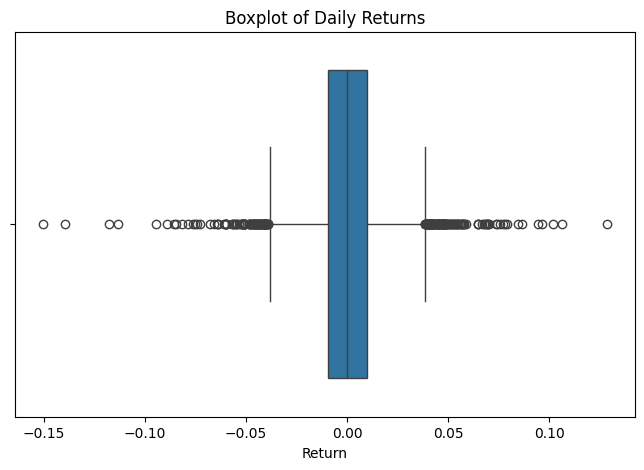

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Close'])
plt.title("Boxplot of Closing Prices")
plt.xlabel("Price")
plt.show()
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Daily_Return'])
plt.title("Boxplot of Daily Returns")
plt.xlabel("Return")
plt.show()

Histogram & KDE: Distribution of Prices & Returns

Histograms and KDE (Kernel Density Estimation) plots help analyze how stock prices and returns are distributed.

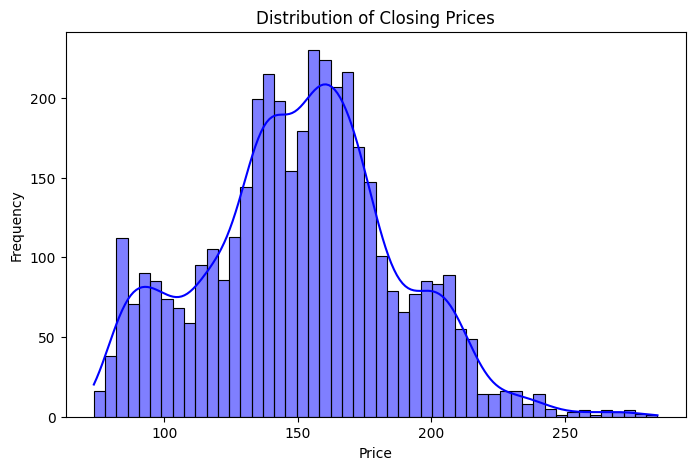

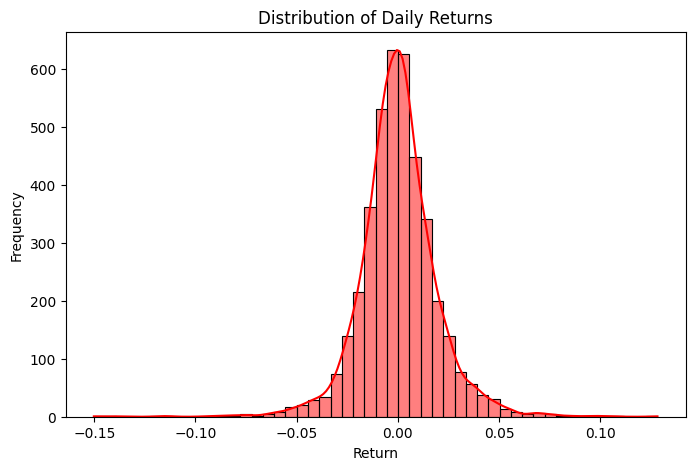

In [ ]:
# Histogram of Closing Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Close'], bins=50, kde=True, color='blue')
plt.title("Distribution of Closing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Histogram of Daily Returns
plt.figure(figsize=(8, 5))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True, color='red')
plt.title("Distribution of Daily Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.show()

Scatter Plot: Closing Price vs Volume

A scatter plot of Closing Price vs. Volume helps visualize the relationship between stock price and trading volume. It can reveal important patterns, trends, and potential market behaviors.

A strong correlation between price and volume suggests that high trading volumes often accompany large price changes.

Low volume with high price movements could indicate market manipulation or low liquidity.

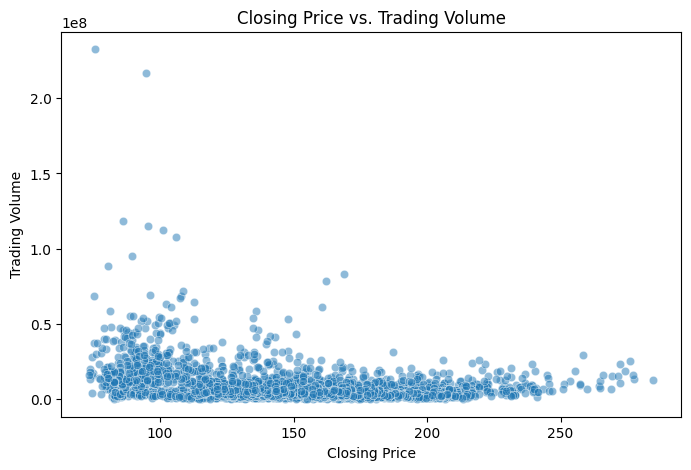

In [ ]:
# Scatter plot of Closing Price vs. Volume
plt.figure(figsize=(8, 5))
sns.scatterplot(y=df['Volume'], x=df['Close'], alpha=0.5)
plt.title("Closing Price vs. Trading Volume")
plt.ylabel("Trading Volume")
plt.xlabel("Closing Price")
plt.show()

Scatter Plot: Closing Price vs Deliverable Volume

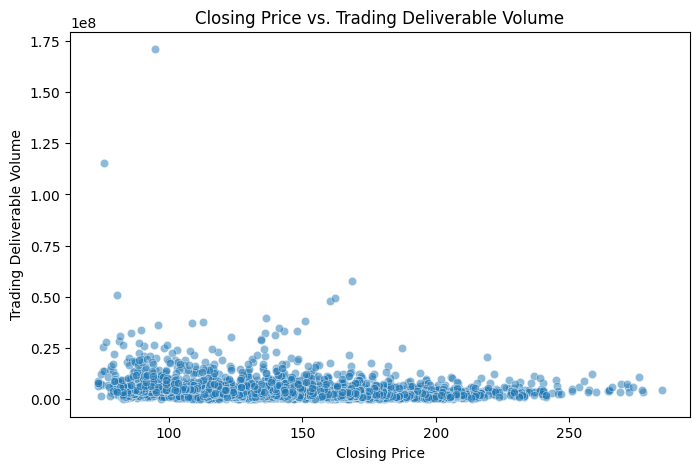

In [ ]:
# Scatter plot of Closing Price vs. Volume
plt.figure(figsize=(8, 5))
sns.scatterplot(y=df['Deliverable Volume'], x=df['Close'], alpha=0.5)
plt.title("Closing Price vs. Trading Deliverable Volume")
plt.ylabel("Trading Deliverable Volume")
plt.xlabel("Closing Price")
plt.show()

Pair Plot: Relationships Between Features

A Pair Plot (also known as Scatterplot Matrix) is a visualization tool that helps explore pairwise relationships between multiple features (variables) in a dataset. It allows you to visualize how different features interact with one another and provides insights into the underlying structure and patterns in the data.

It helps us at:

1.Identifying Relationships Between Features

2.Spotting Outliers

3.Understanding Correlation

4.Feature Selection for Modeling

5.Detecting Trends or Patterns

6.Multivariable Analysis


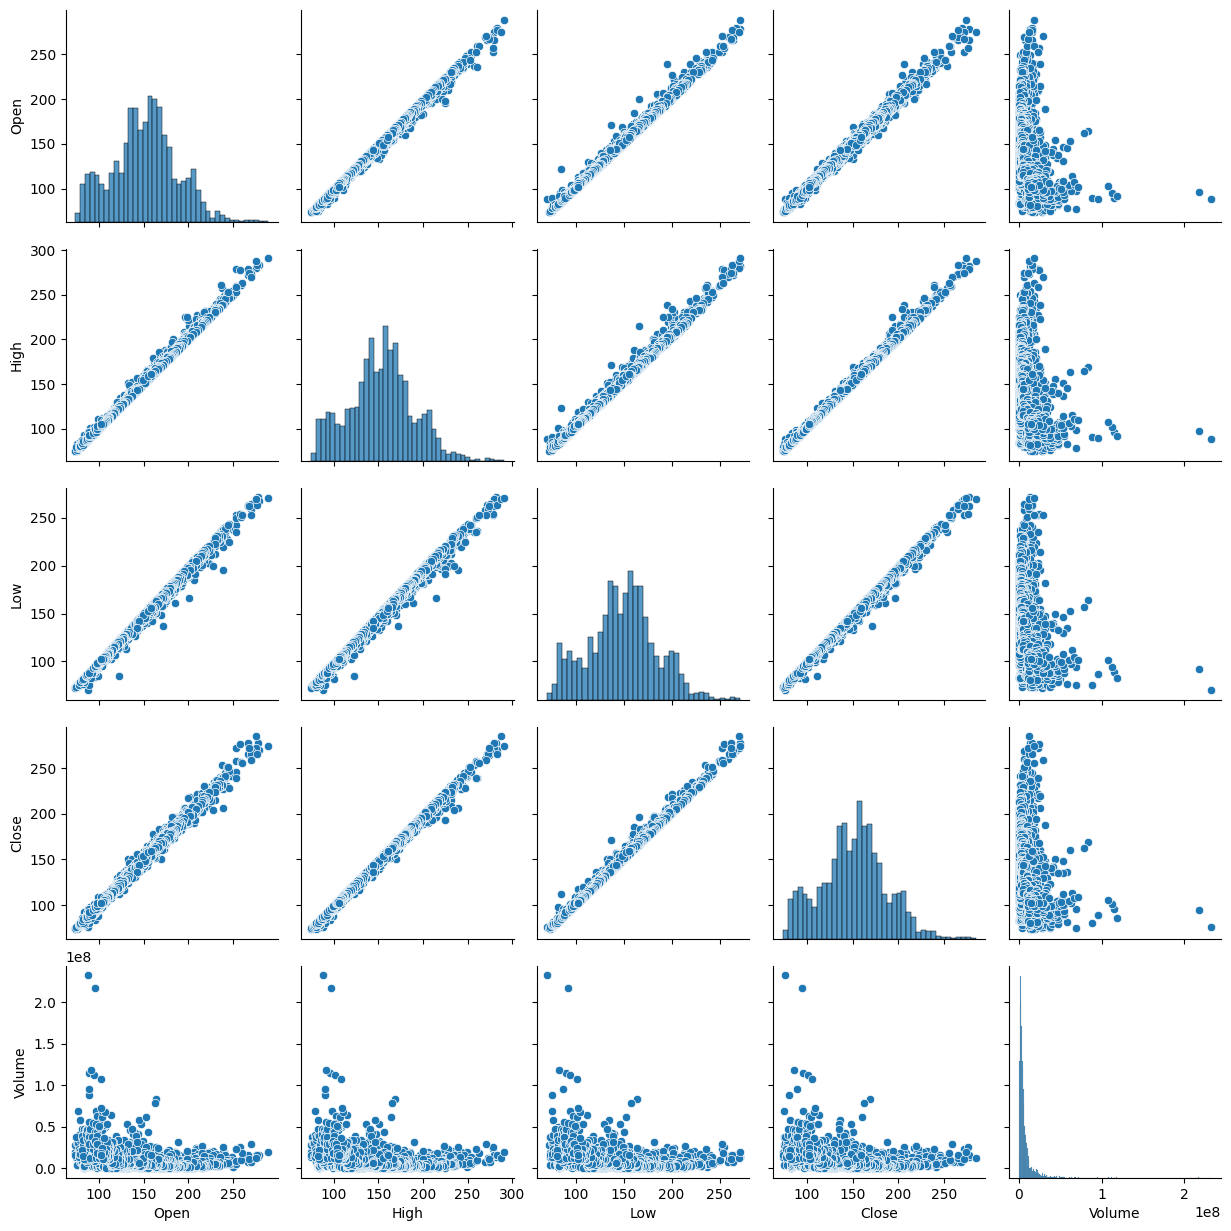

In [ ]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.show()

 Heatmap: Correlation Between Features:

 A heatmap helps visualize which stock indicators are correlated.

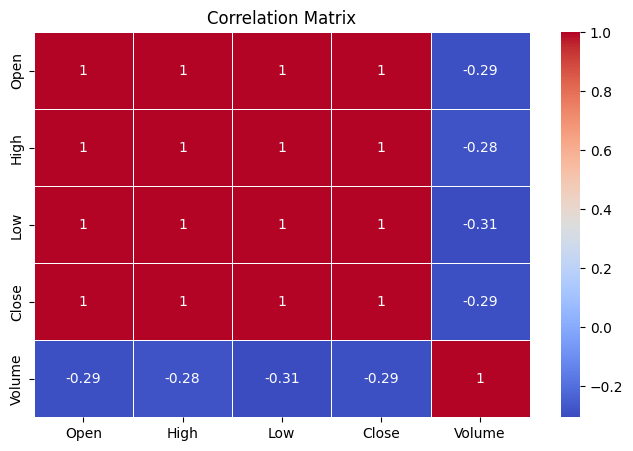

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Bollinger Bands:

Volatility: The width between the upper and lower bands shows market volatility. When the bands widen, it indicates higher volatility, while when they contract, it shows lower volatility.

Overbought/Oversold Conditions:

Price above the upper band suggests overbought conditions.

Price below the lower band suggests oversold conditions.

Formula of Upper band=Rolling Mean + 2 × Standard Deviation

Formula of Lower band= Rolling Mean - 2 × Standard Deviation

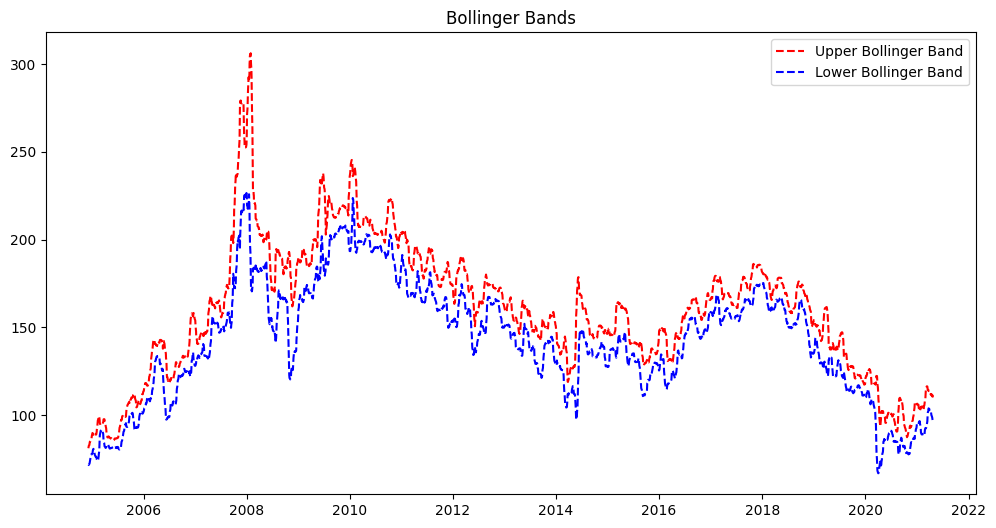

In [ ]:
window = 20
df['Rolling_Mean_20'] = df['Close'].rolling(window=window).mean()
df['Upper_Band'] = df['Rolling_Mean_20'] + 2 * df['Close'].rolling(window=window).std()
df['Lower_Band'] = df['Rolling_Mean_20'] - 2 * df['Close'].rolling(window=window).std()
plt.figure(figsize=(12, 6))
plt.plot(df['Upper_Band'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(df['Lower_Band'], label='Lower Bollinger Band', color='blue', linestyle='--')
plt.title("Bollinger Bands")
plt.legend(loc='best')
plt.show()

 Lag Plot: Check for Autocorrelation

A lag plot checks if past prices influence future prices.

Strong diagonal pattern → Price depends on past values (trend).

Random points → No pattern (random movement).

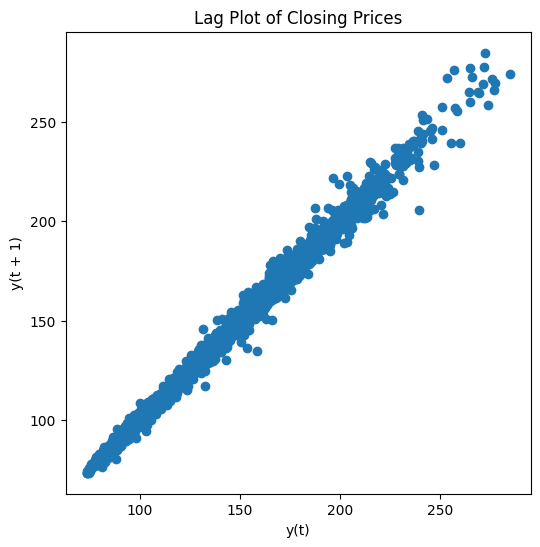

In [ ]:
from pandas.plotting import lag_plot
plt.figure(figsize=(6,6))
lag_plot(df['Close'])
plt.title("Lag Plot of Closing Prices")
plt.show()

Accuracy and the number of models in an ensemble

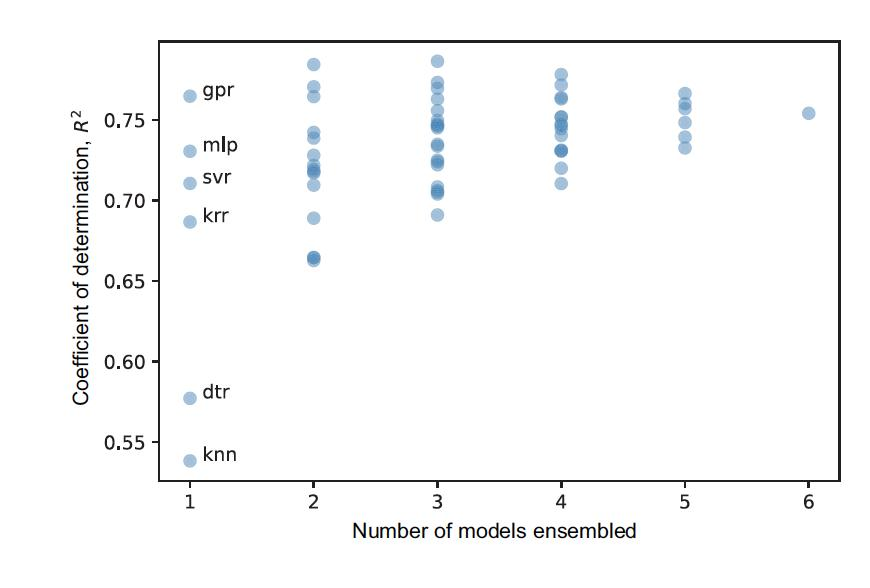

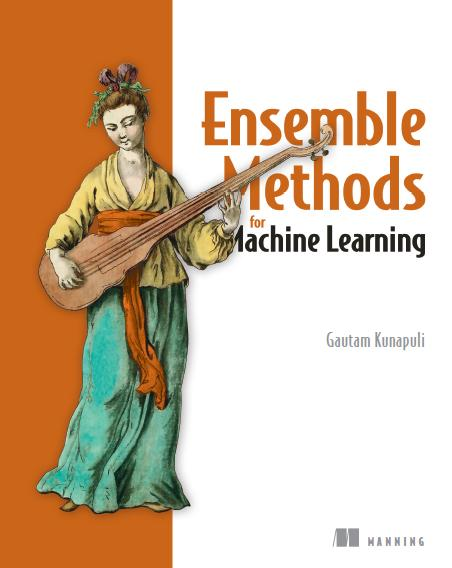